In [1]:
import sys
sys.path.append('../../preprocess_assets/')

In [2]:
# Main libraries 
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

# Our files
from data_shuffling_split import *
from features_extraction import *
from ara_vec_preprocess_configs import *
from ml_modeling import *

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [3]:
strat_train_set = read_file("train/strat_train_set.csv")
strat_train_set.head()

,text,label,classes
0,راجعت الردود فوجدت المتزمتين دينيا هم الاكثر ا...,0,NEG
1,#شاهد_سكاي : #عيد_العمال تراجع اعدد العاطلين,2,OBJ
2,يقوم د / ابو الفتوح التواصل مع مختلف التيارات ...,2,OBJ
3,هل الشرطه والجيش سيطبق عليهم حدود الاجور دي ؟,2,OBJ
4,1 -انسحاب الوفد المصري المشارك في مهرجان مالم...,2,OBJ


In [4]:
x_train_text, x_val_text, y_train, y_val = prepare_data(strat_train_set)

The number of instances in the training data after StratifiedShuffleSplit are:  9608
The number of instances in the testing data after StratifiedShuffleSplit are:   197
The number of trainin instances:  9608
The number of validation instances:  197
The number of trainin labels :  9608
The number of validation labels :  197


In [5]:
x_train_text_tokenized = tokenize_using_nltk_TreebankWordTokenizer(x_train_text)

print("Before Tokenization : \n", x_train_text[:3])
print("="*50)
print("After Tokenization : \n", x_train_text_tokenized[:3])
print("="*50)

x_val_text_tokenized = tokenize_using_nltk_TreebankWordTokenizer(x_val_text)

print("Before Tokenization : \n", x_val_text[:3])
print("="*50)
print("After Tokenization : \n", x_val_text_tokenized[:3])

fullgram_x_train_text_tokenized = get_all_ngrams(x_train_text_tokenized)
print("full gram tokenization : \n", fullgram_x_train_text_tokenized[:3])
print("="*50)
fullgram_x_val_text_tokenized = get_all_ngrams(x_val_text_tokenized)
print("full gram tokenization : \n", fullgram_x_val_text_tokenized[:3])
print("="*50)

Before Tokenization : 
 ['النهارده ومرسي في القفص عرفت ان محافظ سوهاج لسه مسماش اكبر ميدان هناك باسم الشهيد الحسيني ابو ضيف لعل المانع خير يا ب…', 'سعوديون يقاطعون المبيدات بعد ضجه مخاطر الفوسفين #السعوديه #الفوسفين #الصحه', 'ياريت انا اشوفك قصادي #عمرو دياب']
After Tokenization : 
 [['النهارده', 'ومرسي', 'في', 'القفص', 'عرفت', 'ان', 'محافظ', 'سوهاج', 'لسه', 'مسماش', 'اكبر', 'ميدان', 'هناك', 'باسم', 'الشهيد', 'الحسيني', 'ابو', 'ضيف', 'لعل', 'المانع', 'خير', 'يا', 'ب…'], ['سعوديون', 'يقاطعون', 'المبيدات', 'بعد', 'ضجه', 'مخاطر', 'الفوسفين', '#', 'السعوديه', '#', 'الفوسفين', '#', 'الصحه'], ['ياريت', 'انا', 'اشوفك', 'قصادي', '#', 'عمرو', 'دياب']]
Before Tokenization : 
 ['#طيب_نفسي اعيش صح واشتغل صح واكافح صح وانجح صح و #افرح صح بقاا #بلد_اصعب_مافيها_الطموح', '#ارسلي_لاخوك_كلمه_احبك_وصوري_رده_الفعل مو منك من الي يقولك -_-', 'لكل من لم يتمكن من مشاهده مباراه #المصري , #المنيا شاهد ملخص الشوط الاول : ']
After Tokenization : 
 [['#', 'طيب_نفسي', 'اعيش', 'صح', 'واشتغل', 'صح', 'واكافح', 'صح', '

In [6]:
# Get how many words inside each text after tokenization
num_of_words_in_each_text = [len(text) for text in fullgram_x_train_text_tokenized]
max_len = max(num_of_words_in_each_text)
print("The max length is: ", max_len)
num_of_words_in_each_text[:10]

The max length is:  132


[66, 36, 18, 69, 30, 69, 66, 54, 66, 69]

The number of keys before removing are:  39
The number of keys after removing some of them are:  28


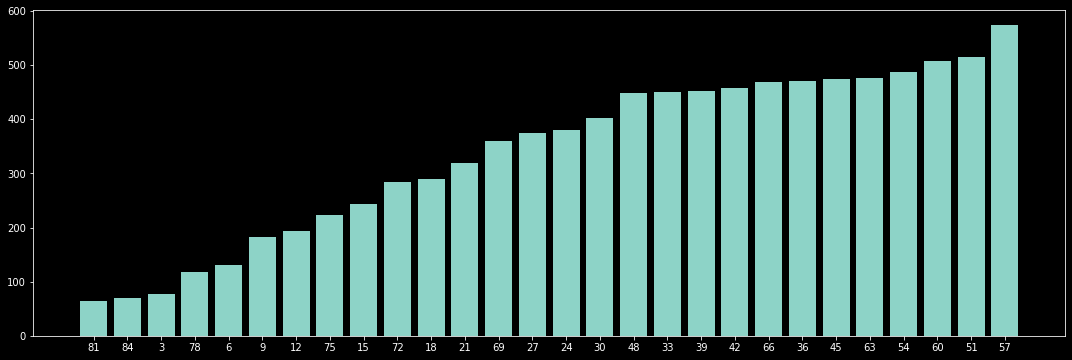

In [8]:
# count how many times these value repeated and sort them
new_dicts = get_keys_that_val_gr_than_num(num_of_words_in_each_text, 50)
keys = list(new_dicts.keys())
values = list(new_dicts.values())
plt.style.use('dark_background')
fig = plt.gcf()
fig.set_size_inches(18.5, 6)
plt.bar(range(len(new_dicts)), values, tick_label=keys)
plt.show()

# Our CBOW Word2Vec Model

In [9]:
our_word2vec_model = load_word2vec_model("../word2vec_models/rezk/cbow/continuous_bow_fullgram_vec_size_300-d_min_count_100")

In [10]:
number_of_features = 300
max_len_str = 132
word2vec_path = "rezk/cbow/"
model_path_to_save = "../ml_models_saved/"
estimators = voting_models()

X_train_embed_matrix = text_to_matrix_using_word2vec(our_word2vec_model, fullgram_x_train_text_tokenized, max_len_str)
X_val_embed_matrix = text_to_matrix_using_word2vec(our_word2vec_model, fullgram_x_val_text_tokenized, max_len_str)

print(X_train_embed_matrix.shape)
print("="*50)
print(X_val_embed_matrix.shape)
print("="*50)

(9608, 132, 300)
(9608, 39600)
[ 0.2228   0.2764  -0.3428   0.1289   0.2756  -0.1613   0.1791  -0.1652
  0.277   -0.09436  0.1047   0.1583  -0.4065  -0.4685   0.491    0.197
  0.03885  0.2944   0.07776  0.12494  0.0792   0.09235  0.2615   0.05557
 -0.3928  -0.12067  0.3289   0.2595   0.4407   0.3936  -0.5015  -0.369
  0.3354  -0.03983 -0.2014  -0.396    0.1312  -0.06805 -0.12354 -0.3542
  0.2317   0.1796  -0.354    0.6606  -0.4553  -0.1615  -0.04578  0.2003
  0.06076  0.2122 ]
(197, 132, 300)
(197, 39600)
[ 0.1197   -0.08057   0.256     0.3127   -0.1814    0.01332  -0.119
  0.47      0.2494    0.11707   0.1351   -0.09357  -0.12415  -0.05933
  0.3179    0.3047    0.05292   0.0465    0.05658  -0.10095  -0.3416
  0.216     0.035    -0.1769   -0.3508   -0.01717  -0.01051  -0.1118
  0.0577   -0.4587   -0.5444   -0.01651  -0.229    -0.00784   0.1248
 -0.04178   0.04962   0.002243 -0.1031   -0.2349    0.2467   -0.02512
  0.5356   -0.02791   0.3518   -0.0866    0.2328    0.328    -0.479
 -0.01

In [11]:
# Train Logistic Regression

model = LogisticRegression(penalty='l2', C=1, multi_class='multinomial', solver='lbfgs', verbose=1)
model = ml_classifer_pipeline(model, X_train_embed_matrix, y_train, X_val_embed_matrix, y_val,word2vec_path, model_path_to_save)

print("=" * 50)

# Train SVC

model = LinearSVC(C=0.5,  max_iter=50, verbose=1)
model = ml_classifer_pipeline(model, X_train_embed_matrix, y_train, X_val_embed_matrix, y_val,word2vec_path, model_path_to_save)


# AdaBoost 
print("=" * 50)


model = LinearSVC(C=0.5,  verbose=1)
model = AdaBoostClassifier(model,  algorithm="SAMME", n_estimators=5)
model = ml_classifer_pipeline(model, X_train_embed_matrix, y_train, X_val_embed_matrix, y_val,word2vec_path, model_path_to_save)

#  Gradient Boosting
print("=" * 50)

model = GradientBoostingClassifier(n_estimators=10, subsample=.1, learning_rate=.5,   max_depth=5, verbose=1)
model = ml_classifer_pipeline(model, X_train_embed_matrix, y_train, X_val_embed_matrix, y_val,word2vec_path, model_path_to_save)
print("=" * 50)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =       158404     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.33195D+04    |proj g|=  4.02300D+03


 This problem is unconstrained.



At iterate   50    f=  3.98575D+02    |proj g|=  3.63275D+00

At iterate  100    f=  2.86392D+02    |proj g|=  1.60045D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
*****    100    105      1     0     0   1.600D+00   2.864D+02
  F =   286.39191302846177     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
===================== Validate Result =====================
F1 score is:  0.6243654822335025
It takes to run:  0:00:50.569116


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   47.2s finished


[LibLinear].....
optimization finished, #iter = 50

Using -s 2 may be faster (also see FAQ)

Objective value = -15.969267
nSV = 4391
.....
optimization finished, #iter = 50

Using -s 2 may be faster (also see FAQ)

Objective value = -6.431691
nSV = 3496
.....
optimization finished, #iter = 50

Using -s 2 may be faster (also see FAQ)

Objective value = -30.086328
nSV = 5285
.....
optimization finished, #iter = 50

Using -s 2 may be faster (also see FAQ)

Objective value = -9.318669
nSV = 3099


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


===================== Validate Result =====================
F1 score is:  0.5888324873096447
It takes to run:  0:00:56.773928
[LibLinear]..*
optimization finished, #iter = 23
Objective value = -0.241845
nSV = 9040
..*
optimization finished, #iter = 24
Objective value = -0.153782
nSV = 8502
..*
optimization finished, #iter = 26
Objective value = -0.338330
nSV = 9390
..*
optimization finished, #iter = 21
Objective value = -0.138729
nSV = 8395
[LibLinear]....**
optimization finished, #iter = 43
Objective value = -0.353055
nSV = 9547
...*
optimization finished, #iter = 33
Objective value = -0.261478
nSV = 9147
...*
optimization finished, #iter = 34
Objective value = -0.304533
nSV = 9572
....*
optimization finished, #iter = 44
Objective value = -0.229704
nSV = 9113
[LibLinear]...........**.*
optimization finished, #iter = 121
Objective value = -0.246612
nSV = 9596
...*
optimization finished, #iter = 33
Objective value = -0.267920
nSV = 9409
.....
optimization finished, #iter = 56
Objective 

In [12]:
bakr_word2vec_model = load_word2vec_model("../word2vec_models/bakr/cbow/full_grams_cbow_300_twitter.mdl")

In [13]:
word2vec_path = "bakr/cbow/"
model_path_to_save = "../ml_models_saved/"
estimators = voting_models()

X_train_embed_matrix = text_to_matrix_using_word2vec(bakr_word2vec_model, fullgram_x_train_text_tokenized, max_len_str)
X_val_embed_matrix = text_to_matrix_using_word2vec(bakr_word2vec_model, fullgram_x_val_text_tokenized, max_len_str)

print(X_train_embed_matrix.shape)
print("="*50)
print(X_val_embed_matrix.shape)
print("="*50)

(9608, 132, 300)
(9608, 39600)
[ 1.724    0.01857 -0.7485   2.318    0.1946   0.1377  -0.9756  -1.552
  0.8457  -1.429    0.04803 -0.5073  -0.38    -1.314    1.41    -1.382
  0.2452   2.174    1.59     0.3982  -1.219    1.652    0.98     2.082
 -0.204    1.139   -1.912   -1.241    0.838    2.766    1.89    -0.4236
 -0.4282   0.905    0.7793   0.9844   0.4146   0.804   -2.38    -0.9297
 -1.025    1.593    0.3252  -0.822    2.09    -0.8584   1.444   -0.9775
 -2.695   -3.824  ]
(197, 132, 300)
(197, 39600)
[ 1.219   -0.852   -1.605    0.1512  -0.1416   0.768    1.195   -2.252
  0.643   -1.689   -0.6045  -0.2534   0.695    0.191   -0.1715  -0.01604
  0.274    0.635   -0.2417  -0.3171  -0.03336  0.491   -1.507    0.1924
  0.608    0.645    0.2563  -0.02394  0.1873  -0.748    1.549    0.269
  2.766   -0.971   -2.736   -0.6973  -1.264    0.1262   1.438   -0.3967
  0.5605   0.3901  -1.033    0.2598   0.2524   0.881    0.9946  -1.202
  0.5874  -0.7793 ]
(9608, 39600)
(197, 39600)


In [14]:
# Train Logistic Regression

model = LogisticRegression(penalty='l2', C=1, multi_class='multinomial', solver='lbfgs', verbose=1)
model = ml_classifer_pipeline(model, X_train_embed_matrix, y_train, X_val_embed_matrix, y_val,word2vec_path, model_path_to_save)

print("=" * 50)

# Train SVC

model = LinearSVC(C=0.5,  max_iter=50, verbose=1)
model = ml_classifer_pipeline(model, X_train_embed_matrix, y_train, X_val_embed_matrix, y_val,word2vec_path, model_path_to_save)


# AdaBoost 
print("=" * 50)


model = LinearSVC(C=0.5,  verbose=1)
model = AdaBoostClassifier(model,  algorithm="SAMME", n_estimators=5)
model = ml_classifer_pipeline(model, X_train_embed_matrix, y_train, X_val_embed_matrix, y_val,word2vec_path, model_path_to_save)

#  Gradient Boosting
print("=" * 50)

model = GradientBoostingClassifier(n_estimators=10, subsample=.1, learning_rate=.5,   max_depth=5, verbose=1)
model = ml_classifer_pipeline(model, X_train_embed_matrix, y_train, X_val_embed_matrix, y_val,word2vec_path, model_path_to_save)
print("=" * 50)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =       158404     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.33195D+04    |proj g|=  6.08945D+03


 This problem is unconstrained.



At iterate   50    f=  6.63255D+02    |proj g|=  3.29573D+01

At iterate  100    f=  3.00701D+02    |proj g|=  4.48545D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
*****    100    106      1     0     0   4.485D+00   3.007D+02
  F =   300.70088367456606     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
===================== Validate Result =====================
F1 score is:  0.5583756345177665
It takes to run:  0:00:57.930793


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   54.6s finished


[LibLinear].....
optimization finished, #iter = 50

Using -s 2 may be faster (also see FAQ)

Objective value = -7.669410
nSV = 3916
.....
optimization finished, #iter = 50

Using -s 2 may be faster (also see FAQ)

Objective value = -2.655149
nSV = 3160
.....
optimization finished, #iter = 50

Using -s 2 may be faster (also see FAQ)

Objective value = -18.450062
nSV = 5232
.....
optimization finished, #iter = 50

Using -s 2 may be faster (also see FAQ)

Objective value = -4.551476
nSV = 2754
===================== Validate Result =====================
F1 score is:  0.5532994923857868
It takes to run:  0:00:31.822527


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]..*
optimization finished, #iter = 22
Objective value = -0.188334
nSV = 7519
.*
optimization finished, #iter = 19
Objective value = -0.119283
nSV = 6292
..*
optimization finished, #iter = 21
Objective value = -0.278123
nSV = 8678
..*
optimization finished, #iter = 21
Objective value = -0.110282
nSV = 5864
[LibLinear].....*
optimization finished, #iter = 57
Objective value = -0.264407
nSV = 8829
...*
optimization finished, #iter = 37
Objective value = -0.182508
nSV = 7662
....*
optimization finished, #iter = 48
Objective value = -0.262821
nSV = 9429
.....*
optimization finished, #iter = 59
Objective value = -0.180475
nSV = 7309
[LibLinear]................*.*
optimization finished, #iter = 172
Objective value = -0.224146
nSV = 8551
.........**.
optimization finished, #iter = 100
Objective value = -0.157995
nSV = 7132
................*.*
optimization finished, #iter = 172
Objective value = -0.343447
nSV = 9459
............*
optimization finished, #iter = 124
Objective value = -

In [15]:
muhammed_word2vec_model = load_word2vec_model("../word2vec_models/muhammed/cbow/w2v_CBOW_300_3_400_10.model")

In [16]:
word2vec_path = "muhammed/cbow/"
model_path_to_save = "../ml_models_saved/"
estimators = voting_models()

X_train_embed_matrix = text_to_matrix_using_word2vec(muhammed_word2vec_model, fullgram_x_train_text_tokenized, max_len_str)
X_val_embed_matrix = text_to_matrix_using_word2vec(muhammed_word2vec_model, fullgram_x_val_text_tokenized, max_len_str)

print(X_train_embed_matrix.shape)
print("="*50)
print(X_val_embed_matrix.shape)
print("="*50)

(9608, 132, 300)
(9608, 39600)
[-0.2993  -0.9414  -0.53    -1.61     2.11    -1.457    0.921   -0.1442
 -0.6436  -0.4766   1.028    1.548    0.4001   0.4517   0.1744  -0.01796
 -0.1637   0.9844  -0.661    1.197    0.5757  -0.4343   1.135    1.919
  1.556    0.4058   1.598    0.02446 -0.9062   0.5347  -0.282   -1.571
  1.137    1.43    -0.9526   0.9355  -0.773   -1.712    1.314    0.3167
  0.4006   0.7046  -0.7676   0.414   -0.12366  0.3076   0.665    0.05222
 -1.443    1.213  ]
(197, 132, 300)
(197, 39600)
[-0.8604   2.746    0.574    0.4927  -0.1351   0.7847   0.8657   2.04
 -0.5156  -2.664    0.427    0.719   -1.055    0.5635  -0.645    0.07764
  0.7046   0.343    1.837   -2.654   -1.863   -0.308    1.311    2.418
  1.443    0.668    1.513    0.557   -1.431   -2.97     1.071    1.185
  0.4077   0.7334  -0.6304   0.1532  -0.1076   0.05118 -2.068   -0.0967
  1.126   -0.1805   0.2058  -0.757   -0.994    1.165   -0.6196  -0.937
  0.9316   1.735  ]
(9608, 39600)
(197, 39600)


In [17]:
# Train Logistic Regression

model = LogisticRegression(penalty='l2', C=1, multi_class='multinomial', solver='lbfgs', verbose=1)
model = ml_classifer_pipeline(model, X_train_embed_matrix, y_train, X_val_embed_matrix, y_val,word2vec_path, model_path_to_save)

print("=" * 50)

# Train SVC

model = LinearSVC(C=0.5,  max_iter=50, verbose=1)
model = ml_classifer_pipeline(model, X_train_embed_matrix, y_train, X_val_embed_matrix, y_val,word2vec_path, model_path_to_save)

 

print("=" * 50)

model = LinearSVC(C=0.5,  verbose=1)
model = AdaBoostClassifier(model,  algorithm="SAMME", n_estimators=5)
model = ml_classifer_pipeline(model, X_train_embed_matrix, y_train, X_val_embed_matrix, y_val,word2vec_path, model_path_to_save)
print("=" * 50)

#  Gradient Boosting

model = GradientBoostingClassifier(n_estimators=10, subsample=.1, learning_rate=.5,   max_depth=5, verbose=1)
model = ml_classifer_pipeline(model, X_train_embed_matrix, y_train, X_val_embed_matrix, y_val,word2vec_path, model_path_to_save)
print("=" * 50)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =       158404     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.33195D+04    |proj g|=  4.02300D+03


 This problem is unconstrained.



At iterate   50    f=  7.12507D+02    |proj g|=  1.34331D+01

At iterate  100    f=  5.82735D+02    |proj g|=  2.57728D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
*****    100    104      1     0     0   2.577D+00   5.827D+02
  F =   582.73542282510152     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
===================== Validate Result =====================
F1 score is:  0.583756345177665
It takes to run:  0:01:03.386157


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min finished


[LibLinear].....
optimization finished, #iter = 50

Using -s 2 may be faster (also see FAQ)

Objective value = -56.282852
nSV = 4218
.....
optimization finished, #iter = 50

Using -s 2 may be faster (also see FAQ)

Objective value = -28.126288
nSV = 3047
.....
optimization finished, #iter = 50

Using -s 2 may be faster (also see FAQ)

Objective value = -125.287813
nSV = 5508
.....
optimization finished, #iter = 50

Using -s 2 may be faster (also see FAQ)

Objective value = -39.916736
nSV = 2589
===================== Validate Result =====================
F1 score is:  0.5786802030456852
It takes to run:  0:00:23.061504


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear].*
optimization finished, #iter = 15
Objective value = -0.241015
nSV = 8602
.*
optimization finished, #iter = 13
Objective value = -0.159002
nSV = 7426
.*
optimization finished, #iter = 15
Objective value = -0.320446
nSV = 9125
.*
optimization finished, #iter = 13
Objective value = -0.140984
nSV = 6665
[LibLinear]..*
optimization finished, #iter = 22
Objective value = -0.334979
nSV = 9352
.*.
optimization finished, #iter = 20
Objective value = -0.238854
nSV = 8513
.*
optimization finished, #iter = 19
Objective value = -0.308046
nSV = 9475
..*
optimization finished, #iter = 23
Objective value = -0.218008
nSV = 7991
[LibLinear].....*
optimization finished, #iter = 58
Objective value = -0.288043
nSV = 9341
.*.
optimization finished, #iter = 20
Objective value = -0.248018
nSV = 8569
..*
optimization finished, #iter = 23
Objective value = -0.401548
nSV = 9594
.....**
optimization finished, #iter = 53
Objective value = -0.224110
nSV = 7968
[LibLinear]....**
optimization finished, 

# Load best model & predict test set

In [18]:
strat_test_set = read_file("test/strat_test_set.csv")
strat_test_set.head()

,text,label,classes
0,نرجوا عدم متابعه وحظر حسابات : المباحث تابعني ...,2,OBJ
1,المسلماني اغلي متحدث اعلامي للرئيس واشهر كذاب ...,0,NEG
2,الاحد 3 يوليو : ابو الفتوح في ندوه بالمؤتمر ال...,2,OBJ
3,#كبسوله_صحيه #صحه #طفل #طفلي #نوم ##نوبه #نصيحه,2,OBJ
4,#اللي_رافضين_السيسي_رئيس_بيعملوا_فولوا_لبعض #م...,1,NEU


In [19]:
X_test_text = list(strat_test_set['text'])
y_test = strat_test_set['label'].values

In [20]:
X_test_text_tokenized = tokenize_using_nltk_TreebankWordTokenizer(X_test_text)

print("Before Tokenization : \n", X_test_text[:3])
print("="*50)
print("After Tokenization : \n", X_test_text_tokenized[:3])
print("="*50)

fullgram_X_test_text_tokenized = get_all_ngrams(X_test_text_tokenized)
print("full gram tokenization : \n", fullgram_X_test_text_tokenized[:3])
print("="*50)

Before Tokenization : 
 ['نرجوا عدم متابعه وحظر حسابات : المباحث تابعني واتابعك زياده المتابعين الاخبار المحليه #الشعب_يقول_كلمته #جماعه_انصار_بيت_طنيطر #الرياض #جده', 'المسلماني اغلي متحدث اعلامي للرئيس واشهر كذاب ومنافق ومضلل ومحرض تحول الي قليل الادب وضع معارضي الجيش في سله القمامه كلام زباله', 'الاحد 3 يوليو : ابو الفتوح في ندوه بالمؤتمر السنوي لهندسه عين شمس 5 مساء']
After Tokenization : 
 [['نرجوا', 'عدم', 'متابعه', 'وحظر', 'حسابات', ':', 'المباحث', 'تابعني', 'واتابعك', 'زياده', 'المتابعين', 'الاخبار', 'المحليه', '#', 'الشعب_يقول_كلمته', '#', 'جماعه_انصار_بيت_طنيطر', '#', 'الرياض', '#', 'جده'], ['المسلماني', 'اغلي', 'متحدث', 'اعلامي', 'للرئيس', 'واشهر', 'كذاب', 'ومنافق', 'ومضلل', 'ومحرض', 'تحول', 'الي', 'قليل', 'الادب', 'وضع', 'معارضي', 'الجيش', 'في', 'سله', 'القمامه', 'كلام', 'زباله'], ['الاحد', '3', 'يوليو', ':', 'ابو', 'الفتوح', 'في', 'ندوه', 'بالمؤتمر', 'السنوي', 'لهندسه', 'عين', 'شمس', '5', 'مساء']]
full gram tokenization : 
 [['نرجوا', 'عدم', 'متابعه', 'وحظر', 'حسابات', ':'

In [23]:
rezk_model = pickle_load_model("../ml_models_saved/rezk/cbow/AdaBoostClassifier__f1_0.711_ml.sav"  )
bakr_model = pickle_load_model("../ml_models_saved/bakr/cbow/AdaBoostClassifier__f1_0.629_ml.sav"  )
muhammed_model = pickle_load_model("../ml_models_saved/muhammed/cbow/AdaBoostClassifier__f1_0.624_ml.sav"  )

X_test_embed_matrix = text_to_matrix_using_word2vec(our_word2vec_model, fullgram_X_test_text_tokenized, max_len_str)
f1_score_result(rezk_model, X_test_embed_matrix, y_test)
print("="*50)

X_test_embed_matrix = text_to_matrix_using_word2vec(bakr_word2vec_model, fullgram_X_test_text_tokenized, max_len_str)
f1_score_result(bakr_model, X_test_embed_matrix, y_test)
print("="*50)

X_test_embed_matrix = text_to_matrix_using_word2vec(muhammed_word2vec_model, fullgram_X_test_text_tokenized, max_len_str)
f1_score_result(muhammed_model, X_test_embed_matrix, y_test)

(201, 132, 300)
(201, 39600)
[ 0.2988  -0.2693   0.10986 -0.641   -0.2272  -0.833    0.5947   0.2289
  1.029    1.69     0.1128  -0.513    0.5083  -0.5146   0.455    1.061
  0.623    0.8276  -0.07904  1.13     0.2983   0.584   -0.336    0.817
 -0.747    0.2122  -0.772   -1.026   -0.213    0.78     0.2832   0.05463
  0.2041   0.4233  -1.4795   0.4827  -0.4382   0.2524  -0.6396   0.5166
 -0.0176  -0.1283  -0.4321  -0.4316   0.2345   0.10675  0.08984  0.03406
 -0.349    0.0258 ]
===================== Validate Result =====================
F1 score is:  0.6716417910447762
(201, 132, 300)
(201, 39600)
[ 0.1403   2.791   -0.1461  -1.685   -0.5776   0.8594   0.1614  -0.643
  1.949    1.234    0.5005  -1.628    0.01268  0.6436  -1.111   -0.3813
  1.564   -0.1381   0.2703   1.786   -0.4143   0.3918  -0.94     0.798
  1.602    1.107   -1.866    1.3955   2.795   -0.5894   2.129    2.266
  0.918   -0.12256  0.03775 -0.8667  -1.592   -1.315   -0.4163   1.871
 -0.1918  -1.6455  -1.846   -0.6865   1.7

0.692

# Qualitative Evaluation

In [24]:
print("The number of words the model learn from your dataset are:", len(list(our_word2vec_model.wv.index_to_key)))
print("The number of words the model learn from your dataset are:", len(list(bakr_word2vec_model.wv.index_to_key)))
print("The number of words the model learn from your dataset are:", len(list(muhammed_word2vec_model.wv.index_to_key)))

The number of words the model learn from your dataset are: 2027042
The number of words the model learn from your dataset are: 1476715
The number of words the model learn from your dataset are: 49555


In [25]:
our_word2vec_model.wv.most_similar('قابس')

[('ورقله', 0.3904670178890228),
 ('عمومي', 0.3743228018283844),
 ('مخزن', 0.3683922290802002),
 ('نابل', 0.36097875237464905),
 ('شاحنات', 0.3510301411151886),
 ('وهران', 0.3498018980026245),
 ('بنزرت', 0.3469192385673523),
 ('سبيطار', 0.34339210391044617),
 ('الحافلات', 0.34231841564178467),
 ('مقود', 0.33368533849716187)]

In [26]:
bakr_word2vec_model.wv.most_similar('قابس')

[('تطاوين', 0.7341261506080627),
 ('صفاقس', 0.7238403558731079),
 ('جندوبه', 0.711697518825531),
 ('بنزرت', 0.7100087404251099),
 ('المنستير', 0.6773075461387634),
 ('الحسيمه', 0.6545843482017517),
 ('طانطان', 0.6462109684944153),
 ('بنقردان', 0.6412319540977478),
 ('القصرين', 0.6397384405136108),
 ('باتنه', 0.6369710564613342)]

In [27]:
muhammed_word2vec_model.wv.most_similar('قابس')

KeyError: "Key 'قابس' not present in vocabulary"

In [30]:
our_word2vec_model.wv.most_similar('طنطا')

[('المنصوره', 0.8620675802230835),
 ('الزقازيق', 0.7875745892524719),
 ('اسكندريه', 0.7411830425262451),
 ('اسيوط', 0.7398534417152405),
 ('المنوفيه', 0.7239159941673279),
 ('المنيا', 0.7057350277900696),
 ('دمنهور', 0.6983345746994019),
 ('القاهره', 0.6881973743438721),
 ('دمياط', 0.6874300837516785),
 ('حلوان', 0.6631385087966919)]

In [31]:
bakr_word2vec_model.wv.most_similar('طنطا')

[('المنصوره', 0.8640273809432983),
 ('الزقازيق', 0.8412206172943115),
 ('سوهاج', 0.8247262835502625),
 ('اسكندريه', 0.8184147477149963),
 ('اسيوط', 0.8178448677062988),
 ('دمياط', 0.8100054860115051),
 ('المحله', 0.80702805519104),
 ('المنوفيه', 0.7984521389007568),
 ('دمنهور', 0.7942327260971069),
 ('المنيا', 0.794111430644989)]

In [32]:
muhammed_word2vec_model.wv.most_similar('طنطا')

KeyError: "Key 'طنطا' not present in vocabulary"

In [33]:
our_word2vec_model.wv.most_similar('فندق')

[('بفندق', 0.695901095867157),
 ('الفندق', 0.6875008940696716),
 ('منتجع', 0.6816151142120361),
 ('وفندق', 0.6477185487747192),
 ('شاليه', 0.6472563743591309),
 ('فنادق', 0.6468909978866577),
 ('مول', 0.639947772026062),
 ('مطل', 0.5941099524497986),
 ('شقه', 0.5838247537612915),
 ('مطعم', 0.5816810727119446)]

In [34]:
bakr_word2vec_model.wv.most_similar('فندق')

[('منتجع', 0.7481030821800232),
 ('بفندق', 0.7235888242721558),
 ('لفندق', 0.7201179265975952),
 ('وفندق', 0.6753846406936646),
 ('مطعم', 0.6692240834236145),
 ('مول', 0.6612789630889893),
 ('الفندق', 0.6314715147018433),
 ('فنادق', 0.6291308999061584),
 ('مجمع', 0.6255536079406738),
 ('هوتيل', 0.6180466413497925)]

In [35]:
muhammed_word2vec_model.wv.most_similar('فندق')

[('بفندق', 0.7621088624000549),
 ('منتجع', 0.6392004489898682),
 ('الفندقيه', 0.5865583419799805),
 ('فندقيه', 0.5777254104614258),
 ('سويس', 0.5689682960510254),
 ('مول', 0.5638152956962585),
 ('بلازا', 0.5522260069847107),
 ('مطعم', 0.5433758497238159),
 ('فنادق', 0.5408634543418884),
 ('برج', 0.5356990098953247)]

In [36]:
our_word2vec_model.wv.most_similar('🤣')

[('😆', 0.8333120942115784),
 ('😁', 0.8321138620376587),
 ('😜', 0.8205731511116028),
 ('😏', 0.819418728351593),
 ('😅', 0.8010571002960205),
 ('😒', 0.7967824339866638),
 ('هه', 0.7967004776000977),
 ('😂', 0.7781848907470703),
 ('😬', 0.7624844312667847),
 ('😀', 0.7618412375450134)]

In [37]:
bakr_word2vec_model.wv.most_similar('🤣')

KeyError: "Key '🤣' not present in vocabulary"

In [38]:
muhammed_word2vec_model.wv.most_similar('🤣')

KeyError: "Key '🤣' not present in vocabulary"

In [39]:
our_word2vec_model.wv.most_similar('🇰🇼')

[('🇴🇲', 0.6610525846481323),
 ('العيد_الوطني_الكويتي', 0.6014206409454346),
 ('اليوم_الوطني_الكويتي', 0.5943148732185364),
 ('🇦🇪', 0.5859056711196899),
 ('الكويت', 0.5772004127502441),
 ('🇸🇦', 0.5617914795875549),
 ('🇶🇦', 0.5346092581748962),
 ('عمان', 0.5341885685920715),
 ('🇯🇴', 0.5333636999130249),
 ('الحبيبه', 0.5255107283592224)]

In [40]:
bakr_word2vec_model.wv.most_similar('🇰🇼')

[('لزيارتن', 0.5828799605369568),
 ('🇶🇦', 0.5708760023117065),
 ('وشعبهاا', 0.5684718489646912),
 ('شوفو_شكاتب_عن', 0.5620298385620117),
 ('ومثلتم', 0.5597826838493347),
 ('الكويت_قويه', 0.5401729941368103),
 ('يدعوالمغردين', 0.5397713780403137),
 ('🇧🇭', 0.5372673869132996),
 ('\u200e\u200bبنات', 0.5294809341430664),
 ('\ue42c\ue022\ue022', 0.5247477889060974)]

In [41]:
muhammed_word2vec_model.wv.most_similar('🇰🇼')

KeyError: "Key '🇰🇼' not present in vocabulary"

In [42]:
our_word2vec_model.wv.most_similar('IT')

[('تخصص', 0.5229155421257019),
 ('دبلوم', 0.5104511976242065),
 ('هندسه', 0.5050167441368103),
 ('HR', 0.4961112439632416),
 ('تخصصات', 0.49260127544403076),
 ('Design', 0.4920426309108734),
 ('science', 0.48735666275024414),
 ('english', 0.483235627412796),
 ('تخصصي', 0.4781688153743744),
 ('web', 0.4774109125137329)]

In [43]:
bakr_word2vec_model.wv.most_similar('IT')

KeyError: "Key 'IT' not present in vocabulary"

In [44]:
muhammed_word2vec_model.wv.most_similar('IT')

KeyError: "Key 'IT' not present in vocabulary"

In [45]:
our_word2vec_model.wv.most_similar('؟')

[('🤔', 0.7987214922904968),
 ('!', 0.7966918349266052),
 ('ايش', 0.6314217448234558),
 ('😳', 0.6253551840782166),
 ('🙄', 0.6185094714164734),
 ('ليش', 0.60459965467453),
 ('هل', 0.5959916114807129),
 ('بالضبط', 0.5893946886062622),
 ('وليش', 0.5871163606643677),
 ('وين', 0.5863702893257141)]

In [46]:
bakr_word2vec_model.wv.most_similar('؟')

[('!', 0.9033966660499573),
 ('يعني', 0.7405569553375244),
 ('والا', 0.7289409041404724),
 ('.', 0.7240429520606995),
 ('ولا', 0.7213034629821777),
 ('او', 0.7055953145027161),
 ('و', 0.7010874152183533),
 ('لان', 0.6699415445327759),
 ('لو', 0.6614589095115662),
 ('لكن', 0.6578097343444824)]

In [47]:
muhammed_word2vec_model.wv.most_similar('؟')

KeyError: "Key '؟' not present in vocabulary"

In [48]:
our_word2vec_model.wv.most_similar('🌸')

[('🌼', 0.7827603220939636),
 ('🌺', 0.7816051244735718),
 ('🌷', 0.7739440202713013),
 ('🕊', 0.7702279686927795),
 ('🌹', 0.7598779201507568),
 ('🍃', 0.7443662881851196),
 ('🌿', 0.7275475859642029),
 ('⚘', 0.6947581768035889),
 ('🌻', 0.6937012672424316),
 ('💐', 0.6767349243164062)]

In [49]:
bakr_word2vec_model.wv.most_similar('🌸')

[('🍃', 0.8405099511146545),
 ('💕', 0.8223419785499573),
 ('💜', 0.8145712614059448),
 ('✨', 0.8067425489425659),
 ('💗', 0.7939425706863403),
 ('🌿', 0.7814812064170837),
 ('💓', 0.7685064077377319),
 ('🍂', 0.7592586874961853),
 ('🌸🍃', 0.755847156047821),
 ('💞', 0.7555315494537354)]

In [50]:
muhammed_word2vec_model.wv.most_similar('🌸')

KeyError: "Key '🌸' not present in vocabulary"

In [51]:
our_word2vec_model.wv.most_similar('لقاح_كورونا')

[('لقاح_فايزر', 0.6549220681190491),
 ('لقاح_استرازينيكا', 0.6113927364349365),
 ('ضد_كورونا', 0.6070528030395508),
 ('لقاحات_كورونا', 0.5974820256233215),
 ('لقاح_اكسفورد', 0.5744054317474365),
 ('تطعيم_كورونا', 0.5727041959762573),
 ('جائحه_كورونا', 0.5707902312278748),
 ('فيروس_كورونا', 0.5688449144363403),
 ('بسبب_كورونا', 0.5619939565658569),
 ('لقاح_#', 0.5581285953521729)]

In [52]:
bakr_word2vec_model.wv.most_similar('لقاح_كورونا')

KeyError: "Key 'لقاح_كورونا' not present in vocabulary"

In [53]:
muhammed_word2vec_model.wv.most_similar('لقاح_كورونا')

KeyError: "Key 'لقاح_كورونا' not present in vocabulary"

In [54]:
our_word2vec_model.wv.most_similar('covid')

[('Covid', 0.600458562374115),
 ('كوفيد_', 0.5937321782112122),
 ('كوفيد', 0.5223937630653381),
 ('COVID', 0.4459177553653717),
 ('كوفيد-', 0.4404163360595703),
 ('بكوفيد', 0.43128442764282227),
 ('فيروس', 0.4013197422027588),
 ('كورونا', 0.38567104935646057),
 ('19', 0.38514167070388794),
 ('الكوفيد', 0.3841870427131653)]

In [55]:
bakr_word2vec_model.wv.most_similar('covid')

KeyError: "Key 'covid' not present in vocabulary"

In [56]:
muhammed_word2vec_model.wv.most_similar('covid')

KeyError: "Key 'covid' not present in vocabulary"

In [57]:
our_word2vec_model.wv.most_similar('covid_19')

[('covid__', 0.49744975566864014),
 ('Covid_19', 0.40494558215141296),
 ('الزواج_حرام', 0.40035974979400635),
 ('#_لقاح_كورونا', 0.3811917006969452),
 ('هزار_ف_الحاجات', 0.3701528012752533),
 ('يعني_الباك_مضمون', 0.36851733922958374),
 ('ثغرها_الريحان', 0.36113473773002625),
 ('كوفيد-_19', 0.3585827946662903),
 ('حسابشخصي_مسا_النور', 0.35189661383628845),
 ('الفرح_في_الدنيا', 0.3493892252445221)]

In [58]:
bakr_word2vec_model.wv.most_similar('covid_19')

KeyError: "Key 'covid_19' not present in vocabulary"

In [59]:
muhammed_word2vec_model.wv.most_similar('covid_19')

KeyError: "Key 'covid_19' not present in vocabulary"

In [60]:
our_word2vec_model.wv.most_similar('بايدن')

[('ترامب', 0.7947975993156433),
 ('ترمب', 0.7381030321121216),
 ('بايدن،', 0.7302476167678833),
 ('نتنياهو', 0.7187758684158325),
 ('ماكرون', 0.6869528293609619),
 ('اردوغان', 0.6787403225898743),
 ('بوتين', 0.6728297472000122),
 ('الديمقراطين', 0.644228458404541),
 ('وبايدن', 0.6290203928947449),
 ('الرئيس', 0.6224396824836731)]

In [61]:
bakr_word2vec_model.wv.most_similar('بايدن')

[('نتانياهو', 0.7114879488945007),
 ('فيلتمان', 0.7097926139831543),
 ('ميدفيديف', 0.7089357376098633),
 ('بارزاني', 0.7072679996490479),
 ('كوشنير', 0.7028950452804565),
 ('كرزاي', 0.6996715068817139),
 ('اولمرت', 0.6955073475837708),
 ('لافروف', 0.6889652013778687),
 ('شتاينماير', 0.681617259979248),
 ('الرئيس_الافغاني', 0.6776009798049927)]

In [62]:
muhammed_word2vec_model.wv.most_similar('بايدن')

KeyError: "Key 'بايدن' not present in vocabulary"

In [63]:
our_word2vec_model.wv.most_similar('في_صحيح_البخاري')

[('و_بعد_ذلك', 0.3936161398887634),
 ('رضي_الله_عنه،', 0.3857797086238861),
 ('و_قد_قال', 0.38071349263191223),
 ('؟_الجواب_:', 0.3624115288257599),
 ('الي_يوم_القيامه', 0.3621586561203003),
 ('كما_هو_حال', 0.36155667901039124),
 ('رمز_من_رموز', 0.36141517758369446),
 (')_و_في', 0.3522251546382904),
 ('-رحمه_الله-_:', 0.3520318567752838),
 ('رحمه_الله_(', 0.34769999980926514)]

In [64]:
bakr_word2vec_model.wv.most_similar('في_صحيح_البخاري')

KeyError: "Key 'في_صحيح_البخاري' not present in vocabulary"

In [65]:
muhammed_word2vec_model.wv.most_similar('في_صحيح_البخاري')

KeyError: "Key 'في_صحيح_البخاري' not present in vocabulary"

In [66]:
our_word2vec_model.wv.most_similar('الي_يوم_القيامه')

[('الله_يوم_القيامه', 0.4814794957637787),
 ('و_يوم_القيامه', 0.4719352722167969),
 ('القيامه_._.', 0.4676002860069275),
 ('في_يوم_القيامه', 0.4511881172657013),
 ('عليه_يوم_القيامه', 0.4481530785560608),
 ('لي_يوم_القيامه', 0.44698843359947205),
 ('حتي_يوم_القيامه', 0.4436645805835724),
 ('لنا_يوم_القيامه', 0.434238463640213),
 ('له_يوم_القيامه', 0.4084794223308563),
 ('الامم_يوم_القيامه', 0.3992094397544861)]

In [67]:
bakr_word2vec_model.wv.most_similar('الي_يوم_القيامه')

KeyError: "Key 'الي_يوم_القيامه' not present in vocabulary"

In [68]:
muhammed_word2vec_model.wv.most_similar('الي_يوم_القيامه')

KeyError: "Key 'الي_يوم_القيامه' not present in vocabulary"

In [69]:
our_word2vec_model.wv.most_similar('اليهود_الصهاينه')

[('علي_الصهاينه', 0.49538150429725647),
 ('اليهود_و', 0.49214136600494385),
 ('اليهود_والنصاري', 0.4836084544658661),
 ('ضد_الصهاينه', 0.47528502345085144),
 ('و_الصهاينه', 0.47152358293533325),
 ('من_الصهاينه', 0.46886131167411804),
 ('اليهود_.', 0.4323241114616394),
 ('مع_الصهاينه', 0.41039595007896423),
 ('#_الصهاينه', 0.4075412452220917),
 ('اليهود_؟', 0.3928696811199188)]

In [70]:
bakr_word2vec_model.wv.most_similar('اليهود_الصهاينه')

KeyError: "Key 'اليهود_الصهاينه' not present in vocabulary"

In [71]:
muhammed_word2vec_model.wv.most_similar('اليهود_الصهاينه')

KeyError: "Key 'اليهود_الصهاينه' not present in vocabulary"

In [72]:
our_word2vec_model.wv.most_similar('بن_خلدون')

[('بن_عبدالرحمن', 0.3823440372943878),
 ('بن_مسلم', 0.37824639678001404),
 ('بن_تميم', 0.3745449483394623),
 ('بن_كيران', 0.3713802397251129),
 ('بن_سالم', 0.3708139657974243),
 ('بن_عاشور', 0.3656267821788788),
 ('بن_حسن', 0.36195409297943115),
 ('بن_سيف', 0.35794371366500854),
 ('بن_جابر', 0.3535201847553253),
 ('بن_دغيثر', 0.348258376121521)]

In [73]:
bakr_word2vec_model.wv.most_similar('بن_خلدون')

KeyError: "Key 'بن_خلدون' not present in vocabulary"

In [74]:
muhammed_word2vec_model.wv.most_similar('بن_خلدون')

KeyError: "Key 'بن_خلدون' not present in vocabulary"

In [75]:
from word2vec_results import *

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computing 18 nearest neighbors...
[t-SNE] Indexed 19 samples in 0.000s...
[t-SNE] Computed neighbors for 19 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 19 / 19
[t-SNE] Mean sigma: 3.651945
[t-SNE] KL divergence after 100 iterations with early exaggeration: 32.712387
[t-SNE] KL divergence after 150 iterations: 0.501083
The shape of our word_features is: (19, 2)


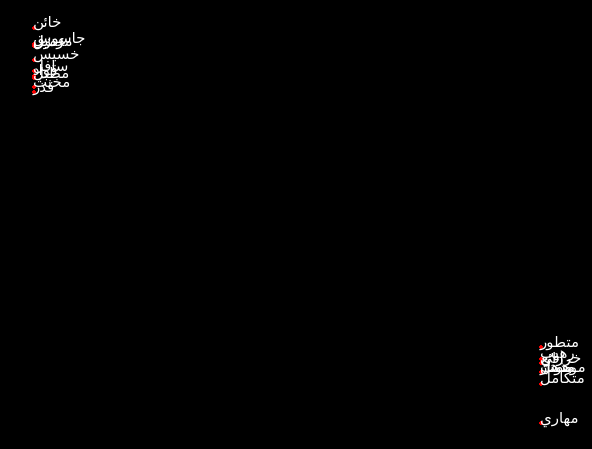

In [76]:
# Reduce the dimension of SENTIMENT_WORDS
tsne_df_scale = tsne_graph(our_word2vec_model, SENTIMENT_WORDS, 500, .03)

_ = init_graph_style()

plt.scatter(tsne_df_scale.iloc[:, 0], tsne_df_scale.iloc[:, 1], marker='P',s=9, c="red") 

for i, word in enumerate(SENTIMENT_WORDS):
    # handle Arabic words to display from right to left and as complete word not just separate chars
    word = arabic_reshaper.reshape(word) # handle arabic words on ploting
    word = get_display(word)
    # plot each word beside its point
    plt.annotate(word, xy=(tsne_df_scale.iloc[i, 0], tsne_df_scale.iloc[i, 1]),fontsize=15, color='white')
# plt.savefig('images/' + "image1.png")

In [77]:
# Reduce the dimension of SENTIMENT_WORDS
tsne_df_scale = tsne_graph(muhammed_word2vec_model, SENTIMENT_WORDS, 500, .03)

_ = init_graph_style()

plt.scatter(tsne_df_scale.iloc[:, 0], tsne_df_scale.iloc[:, 1], marker='P',s=9, c="red") 

for i, word in enumerate(SENTIMENT_WORDS):
    # handle Arabic words to display from right to left and as complete word not just separate chars
    word = arabic_reshaper.reshape(word) # handle arabic words on ploting
    word = get_display(word)
    # plot each word beside its point
    plt.annotate(word, xy=(tsne_df_scale.iloc[i, 0], tsne_df_scale.iloc[i, 1]),fontsize=15, color='white')
# plt.savefig('images/' + "image1.png")

KeyError: "Key 'خائن' not present"

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computing 18 nearest neighbors...
[t-SNE] Indexed 19 samples in 0.000s...
[t-SNE] Computed neighbors for 19 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 19 / 19
[t-SNE] Mean sigma: 9.311430
[t-SNE] KL divergence after 100 iterations with early exaggeration: 34.526199
[t-SNE] KL divergence after 150 iterations: 0.552362
The shape of our word_features is: (19, 2)


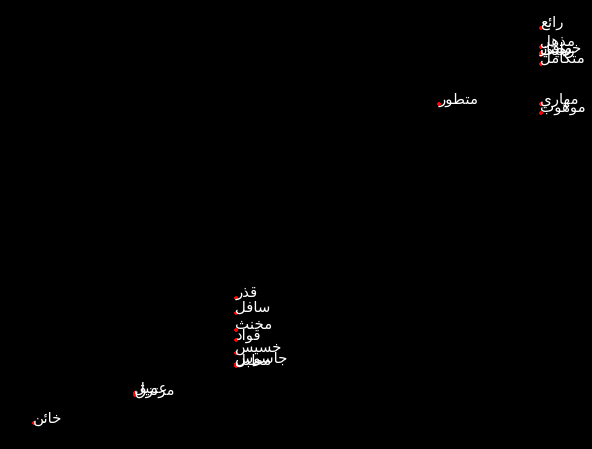

In [78]:
# Reduce the dimension of SENTIMENT_WORDS
tsne_df_scale = tsne_graph(bakr_word2vec_model, SENTIMENT_WORDS, 500, .03)

_ = init_graph_style()

plt.scatter(tsne_df_scale.iloc[:, 0], tsne_df_scale.iloc[:, 1], marker='P',s=9, c="red") 

for i, word in enumerate(SENTIMENT_WORDS):
    # handle Arabic words to display from right to left and as complete word not just separate chars
    word = arabic_reshaper.reshape(word) # handle arabic words on ploting
    word = get_display(word)
    # plot each word beside its point
    plt.annotate(word, xy=(tsne_df_scale.iloc[i, 0], tsne_df_scale.iloc[i, 1]),fontsize=15, color='white')
# plt.savefig('images/' + "image1.png")

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 65 samples in 0.000s...
[t-SNE] Computed neighbors for 65 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 65 / 65
[t-SNE] Mean sigma: 2.998677
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.409801
[t-SNE] KL divergence after 1400 iterations: 0.245110
The shape of our word_features is: (65, 2)


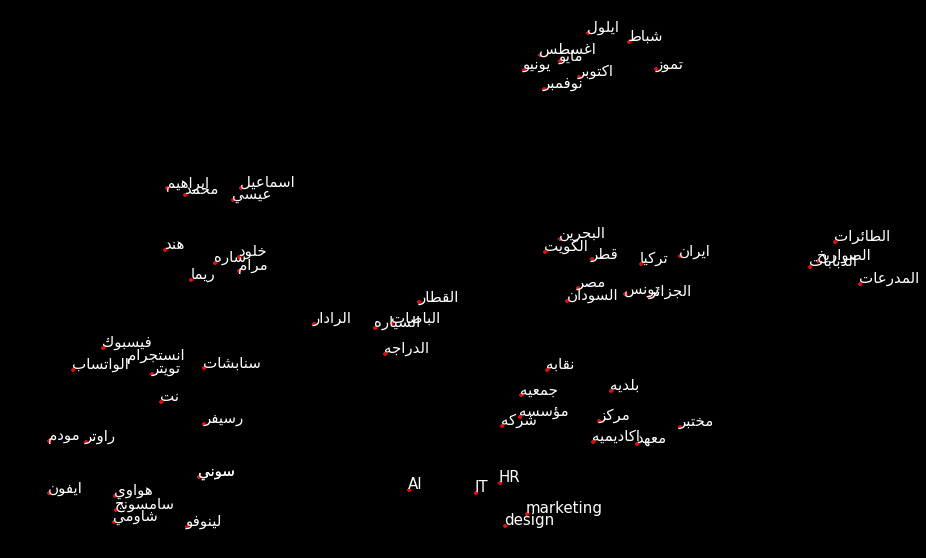

In [79]:
# Reduce the dimension of NER_WORDS
tsne_df_scale = tsne_graph(our_word2vec_model, NER_WORDS, 1400, .06)

_ = init_graph_style(figsize=(16, 10))

plt.scatter(tsne_df_scale.iloc[:, 0], tsne_df_scale.iloc[:, 1], marker='P',s=9, c="red") 

for i, word in enumerate(NER_WORDS):
    # handle Arabic words to display from right to left and as complete word not just separate chars
    word = arabic_reshaper.reshape(word) # handle arabic words on ploting
    word = get_display(word)
    # plot each word beside its point
    plt.annotate(word, xy=(tsne_df_scale.iloc[i, 0], tsne_df_scale.iloc[i, 1]),fontsize=15, color='white')
# plt.savefig('images/' + "image1.png")

In [80]:
# Reduce the dimension of NER_WORDS
tsne_df_scale = tsne_graph(bakr_word2vec_model, NER_WORDS, 1400, .06)

_ = init_graph_style(figsize=(16, 10))

plt.scatter(tsne_df_scale.iloc[:, 0], tsne_df_scale.iloc[:, 1], marker='P',s=9, c="red") 

for i, word in enumerate(NER_WORDS):
    # handle Arabic words to display from right to left and as complete word not just separate chars
    word = arabic_reshaper.reshape(word) # handle arabic words on ploting
    word = get_display(word)
    # plot each word beside its point
    plt.annotate(word, xy=(tsne_df_scale.iloc[i, 0], tsne_df_scale.iloc[i, 1]),fontsize=15, color='white')
# plt.savefig('images/' + "image1.png")

KeyError: "Key 'IT' not present"

In [81]:
# Reduce the dimension of NER_WORDS
tsne_df_scale = tsne_graph(muhammed_word2vec_model, NER_WORDS, 1400, .06)

_ = init_graph_style(figsize=(16, 10))

plt.scatter(tsne_df_scale.iloc[:, 0], tsne_df_scale.iloc[:, 1], marker='P',s=9, c="red") 

for i, word in enumerate(NER_WORDS):
    # handle Arabic words to display from right to left and as complete word not just separate chars
    word = arabic_reshaper.reshape(word) # handle arabic words on ploting
    word = get_display(word)
    # plot each word beside its point
    plt.annotate(word, xy=(tsne_df_scale.iloc[i, 0], tsne_df_scale.iloc[i, 1]),fontsize=15, color='white')
# plt.savefig('images/' + "image1.png")

KeyError: "Key 'IT' not present"